# Density Estimation

In [1]:
import numpy as np
from handout import get_data
from matplotlib import pyplot as plt

In [2]:
data = get_data(num_data=200)

In [3]:
data[:20]

[27.06854624427116,
 26.167724712640652,
 27.764996245964504,
 25.474121617380497,
 27.244855282557854,
 21.608583277180326,
 26.4212765710452,
 30.032597031886965,
 29.245068881819407,
 27.229998500309456,
 29.819511620289564,
 27.89159650241665,
 28.062612806700972,
 29.603526392994592,
 36.1997861104527,
 26.98381740996906,
 27.262289183887138,
 35.907357382676246,
 29.642896670466925,
 27.698575099872986]

## Histogram Estimation

In [4]:
class Histogram:
    
    def __init__(self,center=0,bins=100,width=1):
        self.center = center
        self.bins = bins
        self.width = width
    
    def data2ix(self,x):
        return int(np.floor((x-self.center)/self.width)) + self.bins
    
    def estimate(self,data):
        self.prob = np.zeros(self.bins*2,dtype = float)
        for x in data:
            ix = self.data2ix(x)
            if ix >=0 and ix < self.bins*2:
                self.prob[ix] += 1
        self.prob /= self.prob.sum()
        
    def plot_distribution(self):
        x = np.arange(-self.bins+self.center,self.bins+self.center)*self.width
        print(x.shape,self.prob.shape)
        plt.plot(x,self.prob)
        plt.show()

In [5]:
hist = Histogram(center=25,bins=40,width=0.5)
hist.estimate(data)

(80,) (80,)


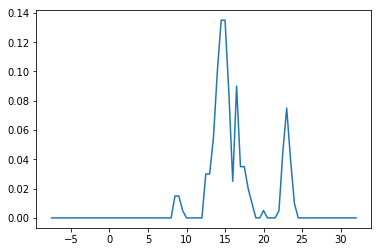

In [6]:
hist.plot_distribution()

## Kernel Density Estimation

In [7]:
class KernelDensity:
    
    def __init__(self,h=1):
        self.h = h
        
    def estimate(self,data):
        self.data = data
    
    def plot_distribution(self):
        x = np.arange(-5,50,0.5)
        p = np.zeros(x.shape[0],dtype=float)
        for val in data:
            p += np.exp(-(x-val)*(x-val)/(2*self.h*self.h))/(np.sqrt(2*np.pi)*self.h)
        p /= len(data)
        plt.plot(x,p)
        plt.show()

In [8]:
kernel = KernelDensity()
kernel.estimate(data)

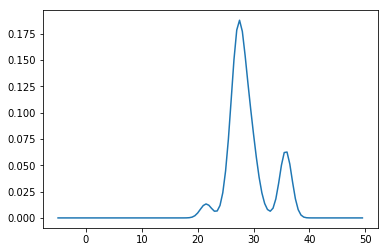

In [9]:
kernel.plot_distribution()

# Nearest Neigbor Method

In [51]:
class NearestNeigbor:
    
    def __init__(self,k=3):
        self.k = k
        
    def estimate(self,data):
        self.data = np.array(data)
    
    def density(self,val):
        return 1.0*self.k/sorted(np.abs(self.data-val))[self.k-1]/len(self.data)
    
    def plot_distribution(self):
        x = np.arange(-5,50,0.5)
        y = np.array([self.density(val) for val in x])
        plt.plot(x,y)
        plt.show()

In [52]:
knn = NearestNeigbor()
knn.estimate(data)

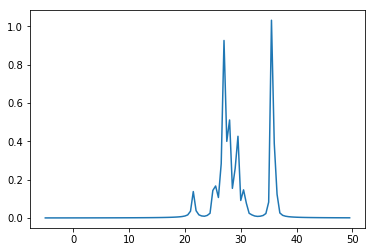

In [53]:
knn.plot_distribution()